In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize


In [2]:
#Read genome sequence file

genome_sequence = ''
with open('NC_011297.fna', 'r') as f :
    f.readline()
    
    for line in f :
        genome_sequence += line.strip()

print('genome length = ' + str(len(genome_sequence)))

genome length = 1959987


In [3]:
print(genome_sequence[1:20])
print(max(1, 2))

GCAATTTTTTTATAATACC
2


In [4]:
#Problem 2.1 - 2.2

# Takes as input the emission sequence (genome) and probability parameters
# Outputs the most likely state sequence using Viterbi decoding
# emissions are observations.
def viterbi_decode(emissions, initial_probilites, transition_probilites, emission_probilities):
    T = len(emissions)
    
    max_states_logprob = 0
    max_states = [0] * T
    
    # using log probabilities are computationally more efficient.
    initial_probilities_log = np.log(initial_probilites)
    transition_probilities_log = np.log(transition_probilites)
    emission_probilities_log = np.log(emission_probilities)
    
    # Bad code design, remove from here. Make input emissions: 1, 2, 3, 4.
    state_given_emission_table = {'A': np.log(emission_probilities[:, 0]), \
                                  'C': np.log(emission_probilities[:, 1]), \
                                  'G': np.log(emission_probilities[:, 2]), \
                                  'T': np.log(emission_probilities[:, 3]) }
    
    length_emissions = len(emissions)
    length_hidden_vlaues = emission_probilities.shape[0]
    
    # Implement the Viterbi decoding algorithm
    # Store the decoded state sequence in 'max_states'
    # Store the state sequence log likelihood in 'max_states_logprob'
    
    probility_matrix_log = np.zeros((length_hidden_vlaues,length_emissions))
    probility_matrix_log[:, 0] = initial_probilities_log + state_given_emission_table[emissions[0]]
    
    for i in range(1, length_emissions):
        
        current_transition_probability_0 = max(probility_matrix_log[0, i - 1] + transition_probilities_log[0, 0], \
                                               probility_matrix_log[1, i - 1] + transition_probilities_log[1, 0])
        current_transition_probability_1 = max(probility_matrix_log[1, i - 1] + transition_probilities_log[1, 1], \
                                               probility_matrix_log[0, i - 1] + transition_probilities_log[0, 1])
        current_transition_probability = [current_transition_probability_0, current_transition_probability_1]
        probility_matrix_log[:, i] = current_transition_probability + state_given_emission_table[emissions[i]]
        i = i + 1

    states_labeled = np.argmax(probility_matrix_log, axis = 0)
    max_end_logprob = np.max(probility_matrix_log[:, length_emissions - 1])
    
    return max_end_logprob, states_labeled

# Takes as input the emission sequence (genome) and probability parameters
# Outputs new (re-estimated) probability parameters

def viterbi_train(emissions, initial_probilites, transition_probilites, emission_probilities, iterations = 10):
    given_probabilities = {'A': {0: 0, 1: 0}, 'C': {0: 0, 1: 0} , 'G': {0: 0, 1: 0} , 'T': {0: 0, 1: 0} }
    
    new_transition_probilites = transition_probilites
    new_emission_probilities = emission_probilities
    
    for i in range(iterations):
        something, states_labeled \
        = viterbi_decode(emissions, initial_probilites, new_transition_probilites, new_emission_probilities)
        
        for i in range(len(emissions)):
            given_probabilities[emissions[i]][states_labeled[i]] = \
                given_probabilities[emissions[i]][states_labeled[i]] + 1
    
        log_probs = np.array([given_probabilities[key] for key in ('A', 'C', 'G', 'T')]).T

        log_probs_array = np.zeros((2, 4))
        for i in range(len(log_probs)):
            log_probs_array[:, i] = np.fromiter(log_probs[i].values(), dtype=float)

        new_emission_probilities = normalize(log_probs_array, norm = "l1", axis=1)

        transition_count = {'00': 0, '01': 0 , '10': 0 , '11': 0}

        for i in range(1, len(states_labeled)):
            transition = str(states_labeled[i - 1]) + str(states_labeled[i])
            transition_count[transition] = transition_count[transition] + 1

        new_transition_probilites = np.array([transition_count[key] for key in ('00', '01', '10', '11')]).T
        new_transition_probilites = np.reshape(new_transition_probilites, (2, 2))
        new_transition_probilites = normalize(new_transition_probilites, norm = "l1", axis=1)
    
    return new_emission_probilities, new_transition_probilites
    
#     new_init_prob = np.zeros(init_prob.shape)

    #TODO: Implement Viterbi training to re-estimate parameters
    #Store the new parameters in the 'new_' matrices
    #Store the Viterbi-decoded state sequence log likelihood in 'log_probs' at each iteration of training

#     return log_probs, new_init_prob, new_trans_prob, new_emission_prob



In [5]:
# Problem 2.1
# Here we initialize the probability matrices for the HMM

# TODO: Initialize P(s_{1})
initial_probabilities = np.array([0.996, 0.004])

# TODO: Initialize P(s_{t} | s_{t-1})
transition_probabilities = np.array([
    [0.999, 0.001], # s_{t-1} = AT
    [0.01, 0.99] # s_{t-1} = GC
])

# A C G T
# TODO: Initialize P(o_{t} | s_{t})
emission_probabilities = np.array([
    [0.291, 0.209, 0.209, 0.291], # s_{t} = AT
    [0.169, 0.331, 0.331, 0.169] # s_{t} = GC
])

In [6]:
# Problem 2.1
# TODO: Run Viterbi decoding to obtain the most likely state sequence for the genome
# genome_sequence = "AAAA"
max_end_logprob, states_labeled = viterbi_decode(genome_sequence, initial_probabilities, transition_probabilities, emission_probabilities)

In [7]:
print(max_end_logprob)
print(states_labeled)

-2640006.4037369997
[0 0 0 ... 0 0 0]


[ 109362  109364  109365 ... 1649452 1649453 1916481]
0.004749011090379681


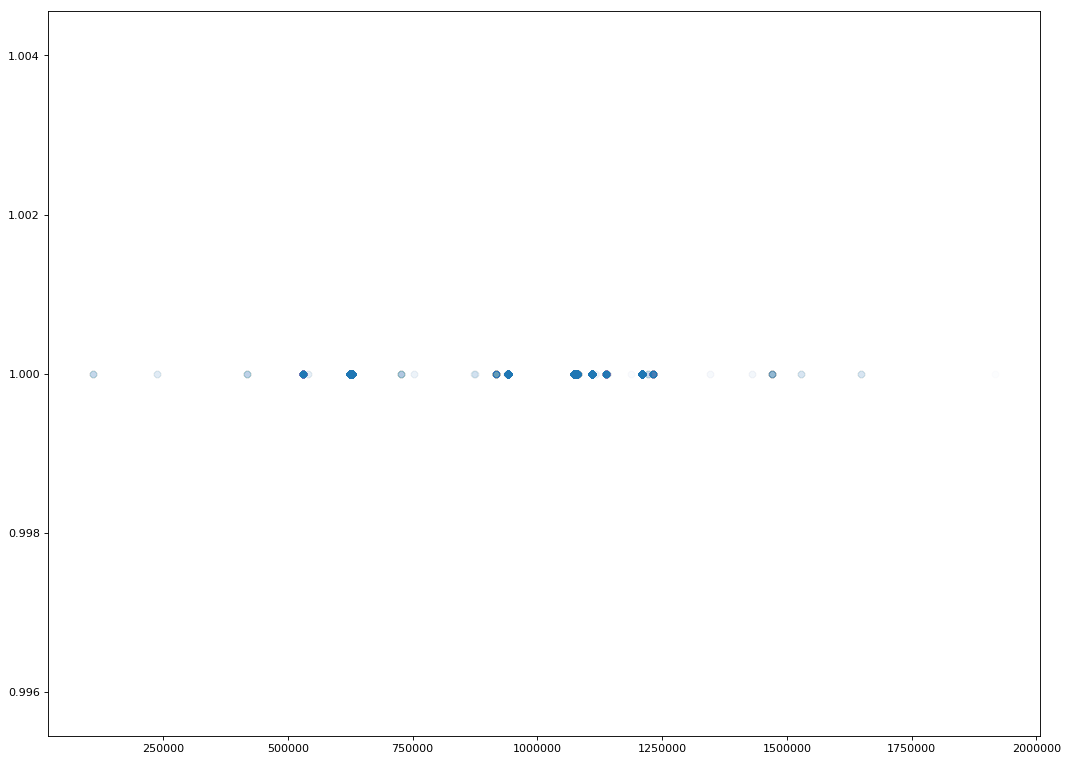

In [8]:
# Problem 2.1
# TODO: Plot the genomic nucleotide coordinates of detected GC-rich regions

plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
import matplotlib.pyplot as plt
indices = np.where(states_labeled==1)[0]
plt.scatter(indices, states_labeled[states_labeled == 1], alpha = 0.01)
plt.plot()

print(indices)
print(len(indices) / len(genome_sequence))

In [9]:
# Problem 2.2
# TODO: Update HMM parameters with Viterbi training
# TODO: Plot genome sequence (emission sequence) likelihood vs. EM iteration
new_emission_probabilities,\
new_transition_probabilities\
= viterbi_train(genome_sequence,initial_probabilities,\
                transition_probabilities, emission_probabilities, iterations = 5)


In [10]:
# plot(range(1, 10), returned_max_end_logprob)

In [11]:
print(new_emission_probabilities)
print(new_transition_probabilities)
print(max_end_logprob)

[[0.33747783 0.16318051 0.17265965 0.32668201]
 [0.2021287  0.30271819 0.28501719 0.21013591]]
[[9.99838698e-01 1.61301508e-04]
 [2.35718039e-02 9.76428196e-01]]
-2640006.4037369997


In [12]:
# Problem 2.2
# TODO: Re-run viterbi decoding with the new probability parameters.
max_end_logprob, states_labeled\
= viterbi_decode(
    genome_sequence, initial_probabilities, new_transition_probabilities, new_emission_probabilities)

0.006780147011179156


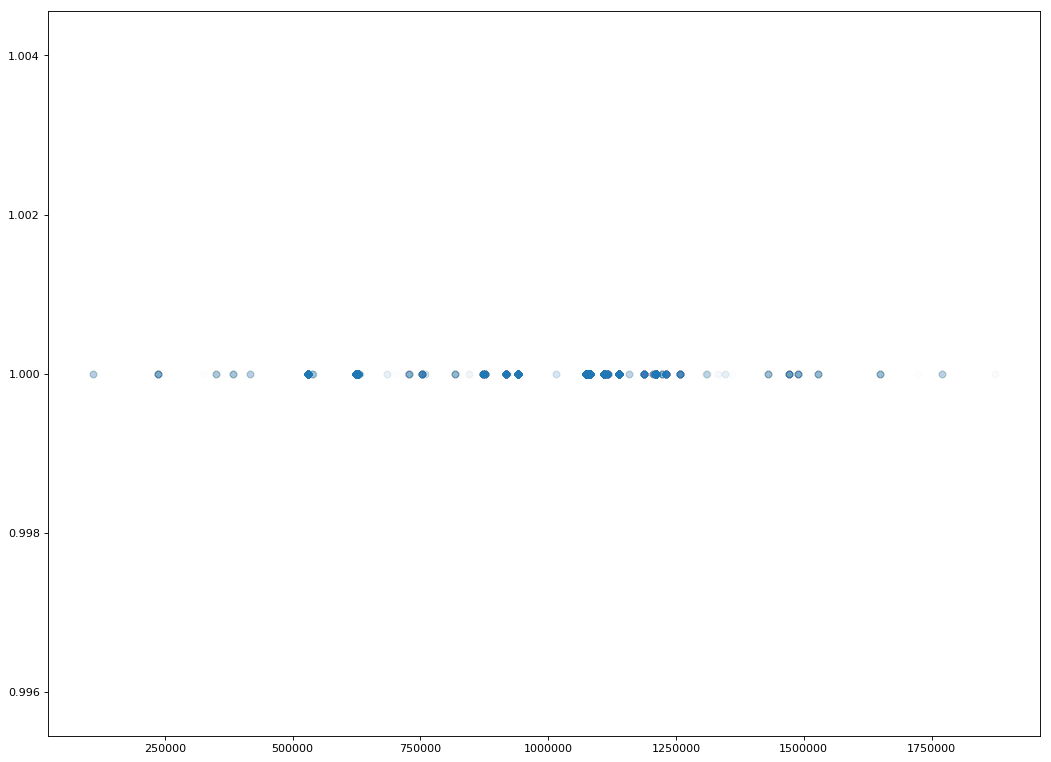

In [13]:
# Problem 2.2
# TODO: Plot the genomic coordinates of newly detected GC-rich regions along with the previous detected regions
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
import matplotlib.pyplot as plt
indices = np.where(states_labeled==1)[0]
plt.scatter(indices, states_labeled[states_labeled == 1], alpha = 0.01)
plt.plot()

print(len(indices) / len(genome_sequence))

In [14]:
print(max_end_logprob)

-2610257.0902618147
